## **Linear vs. Nonlinear**

The "make_moons" data creation routine in sklearn produces non-linear data that is useful for understanding the difference between linear and non-linear classifiers.  he 

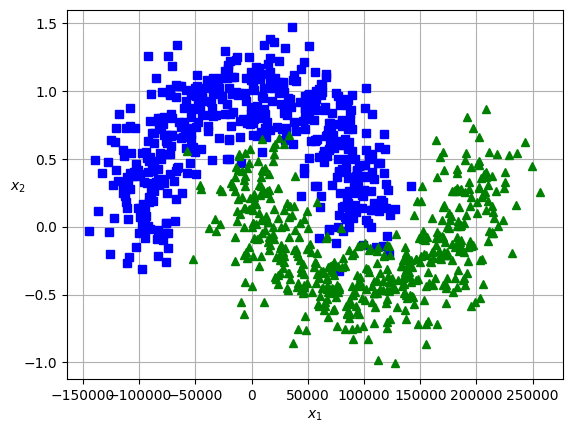

In [4]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X[:,0] = X[:,0]*100000


def plot_dataset(X, y, axes=None):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    if axes:
        plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plot_dataset(X, y)

**Exercise 1**

Using a simple train test split, run a simple LogisticRegression classifier on the above data. Try different solvers.  Which works the best?

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of solvers to try
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

# Iterate through each solver and train a Logistic Regression model
for solver in solvers:
    log_reg = LogisticRegression(solver=solver, random_state=42)
    log_reg.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = log_reg.predict(X_test)
    
    # Calculate and print the accuracy for each solver
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy with solver {solver}: {accuracy}')

Accuracy with solver newton-cg: 0.86
Accuracy with solver lbfgs: 0.655
Accuracy with solver liblinear: 0.655
Accuracy with solver sag: 0.655
Accuracy with solver saga: 0.655


/home/codespace/.local/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/codespace/.local/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/codespace/.local/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/home/codespace/.local/lib/python3.10/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/li

Accuracy with newton-cg works the best compared to others

**Exercise 2**

Note that the two dimensions have vastly different magnitudes. Modify the above, using a standard scaler and pipeline to transform the data.  Does it help?  Do the different solvers have the same relative performance?

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of solvers to try
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

# Initialize a pipeline with StandardScaler and LogisticRegression
for solver in solvers:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('log_reg', LogisticRegression(solver=solver, random_state=42))
    ])
    
    # Train the model using the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = pipeline.predict(X_test)
    
    # Calculate and print the accuracy for each solver
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy with solver {solver}: {accuracy}')


Accuracy with solver newton-cg: 0.855
Accuracy with solver lbfgs: 0.855
Accuracy with solver liblinear: 0.855
Accuracy with solver sag: 0.855
Accuracy with solver saga: 0.855


**Exercise 3**

Try the different following methods to classify your data:

1) GaussianNB
2) KNN (pick the best "nearest neighbors" parameter you can)
3) SVC, linear kernel
4) SVC, poly kernel
5) SVC, rbf kernel

Which performs the best?  Why do you think that is?

In [6]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Assuming you have X and y defined

# Define classifiers
classifiers = {
    'GaussianNB': GaussianNB(),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVC Linear': SVC(kernel='linear'),
    'SVC Poly': SVC(kernel='poly'),
    'SVC RBF': SVC(kernel='rbf')
}

# Evaluate classifiers using cross-validation
for name, clf in classifiers.items():
    if name == 'KNN':
        # Without using StandardScaler
        knn_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
        print(f'KNN (without scaling): Mean Accuracy - {knn_scores.mean()}, Standard Deviation - {knn_scores.std()}')

        # Using StandardScaler
        knn_classifier_with_scaling = Pipeline([('scaler', StandardScaler()), ('knn', clf)])
        knn_scores_with_scaling = cross_val_score(knn_classifier_with_scaling, X, y, cv=5, scoring='accuracy')
        print(f'KNN (with scaling): Mean Accuracy - {knn_scores_with_scaling.mean()}, Standard Deviation - {knn_scores_with_scaling.std()}')
    else:
        # For other classifiers
        scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
        print(f'{name}: Mean Accuracy - {scores.mean()}, Standard Deviation - {scores.std()}')

GaussianNB: Mean Accuracy - 0.635, Standard Deviation - 0.07516648189186453
KNN (without scaling): Mean Accuracy - 0.6300000000000001, Standard Deviation - 0.07810249675906653
KNN (with scaling): Mean Accuracy - 0.6200000000000001, Standard Deviation - 0.08860022573334674
SVC Linear: Mean Accuracy - 0.645, Standard Deviation - 0.08573214099741124
SVC Poly: Mean Accuracy - 0.635, Standard Deviation - 0.06442049363362562
SVC RBF: Mean Accuracy - 0.6849999999999999, Standard Deviation - 0.08602325267042626


**Exercise 4**

In the following, I've set up some code to explore the impact of different parameters and data on an SVC.  As implemented, the current code illustrates how an 'rbf' kernel can overfit the data.  Vary the parameters to examine how different parameters influence performance and overfitting.

1) Try changing the amount of noise in the dataset.  What happens?
2) Try changing the parameter 'gamma.'  What setting seems to avoid overfitting while still performing well.  Have a look at the SVC [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) so you have an understanding of what's going on.
3) Try changing the kernel to a 'poly' kernel, and modify gamma as necessary.  How does this affect performance?

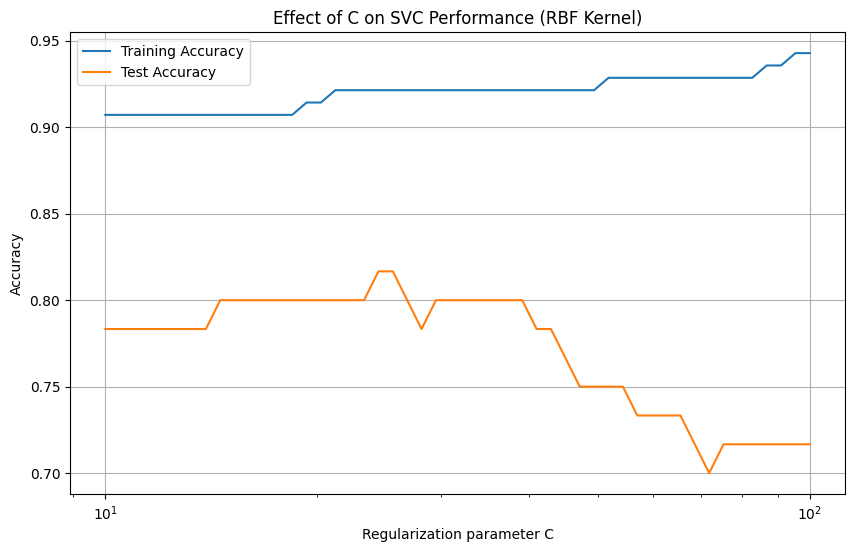

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a noisy moons dataset
X, y = make_moons(n_samples=200, noise=0.4, random_state=42)

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Range of C values to explore
C_values = np.logspace(1,2)  # From very small to somewhat larger (10^4) C values
train_scores = []
test_scores = []

# Explore the effect of C
for C in C_values:
    clf = SVC(C=C, kernel='rbf', gamma=6)  # Using 'scale' for gamma as an example
    clf.fit(X_train, y_train)
    
    # Record training and test scores
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

# Plotting
plt.figure(figsize=(10, 6))
plt.semilogx(C_values, train_scores, label='Training Accuracy')
plt.semilogx(C_values, test_scores, label='Test Accuracy')
plt.legend()
plt.xlabel('Regularization parameter C')
plt.ylabel('Accuracy')
plt.title('Effect of C on SVC Performance (RBF Kernel)')
plt.grid(True)
plt.show()
